# Multiple Variable Linear Regression

In [3]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [4]:
X_train = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train = np.array([460,232,178])

In [5]:
print(f"X_shape:{X_train.shape}, X_type:{type(X_train)}")
print(X_train)
print(f"y_shape:{y_train.shape}, y_type:{type(y_train)}")
print(y_train)



X_shape:(3, 4), X_type:<class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y_shape:(3,), y_type:<class 'numpy.ndarray'>
[460 232 178]


In [6]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


### Single Prediction element by element

In [7]:
def predict_single_loop(x,w,b):
    n=len(x)
    p=0
    for i in range(n):
        p_i = x[i]*w[i]
        p += p_i
    p+=b
    return p


In [9]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value:{x_vec}")

f_wb = predict_single_loop(x_vec,w_init,b_init)
print(f"f_wb shape:{f_wb.shape}, prediction:{f_wb}")

x_vec shape (4,), x_vec value:[2104    5    1   45]
f_wb shape:(), prediction:459.9999976194083


### Compute Cost With Multiple Variables

In [10]:
def compute_cost(X,y,w,b):
    m=len(X)
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w)+b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [12]:
cost = compute_cost(X_train,y_train,w_init,b_init)
print(f"Cost at Optimal w:{cost}")

Cost at Optimal w:1.5578904330213735e-12


### Compute Gradient with Multipl Variables

In [13]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db,dj_dw
    

In [15]:
tmp_dj_db,tmp_dj_dw = compute_gradient(X_train,y_train,w_init,b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: {tmp_dj_dw}")

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


### Gradient Descent With Multiple Variables

In [16]:
def gradient_descent(X,y, w_in,b_in,cost_funtion,gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    if i<100000:
        J_history.append(cost_funtion(X,y,w,b))

    if i% math.ceil(num_iters/100) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w,b,J_history

In [19]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1000
alpha = 5.0e-7

w_final,b_final,J_hist = gradient_descent(X_train,y_train,initial_w,initial_b,
                                         compute_cost,compute_gradient,
                                         alpha,iterations)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")

m,_ = X_train.shape

for i in range(m):
    print(f"Prediction: {np.dot(X_train[i],w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00, [ 0.2   0.   -0.01 -0.07]
Prediction: 426.19, target value: 460
Prediction: 286.17, target value: 232
Prediction: 171.47, target value: 178


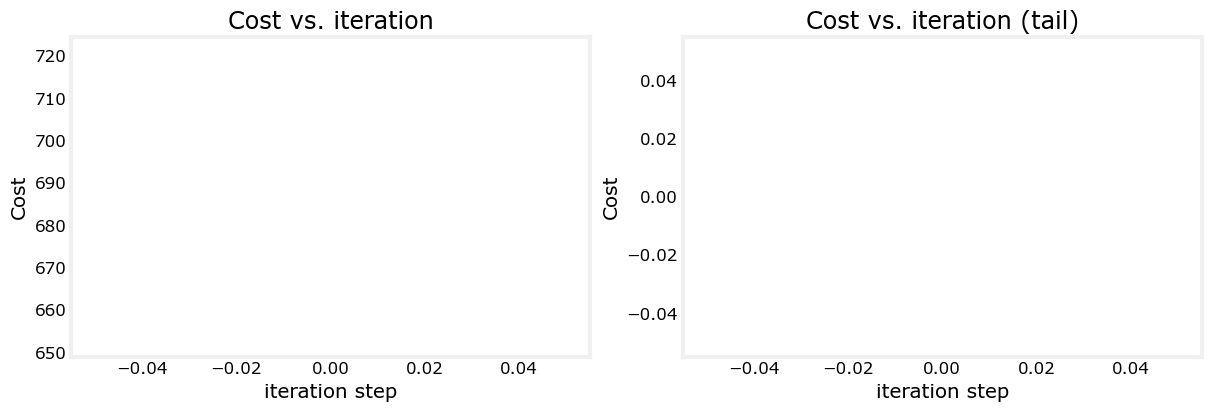

In [20]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()